In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import hdbscan
from sklearn.decomposition import PCA

In [2]:
# read dataset
url = 'https://raw.githubusercontent.com/svetryabova/NMHUcovid19/vglebov/data/usa_county_dataset.csv'
data = pd.read_csv(url)

In [3]:
# separate county names from data
counties = data.iloc[:, 0]
print(counties)

0            Autauga AL
1            Baldwin AL
2            Barbour AL
3               Bibb AL
4             Blount AL
             ...       
1034        Thurston NE
1035    Scotts Bluff NE
1036           Sarpy NE
1037          Saline NE
1038          Platte NE
Name: county, Length: 1039, dtype: object


In [4]:
data = data.iloc[:, 1:]

In [5]:
# normalize data
data = preprocessing.normalize(data, norm='max', axis=0)
print(np.max(data[:, 0]))

1.0


## Perform PCA - identify the most important features

In [6]:
pca = PCA()
x_new = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.58494509 0.17495703 0.11024988 0.04208669 0.03499991 0.02305534
 0.0163343  0.00969847 0.00367327]


In [8]:
print(abs(pca.components_))

[[5.04997485e-02 1.27922914e-02 7.10117849e-02 2.55868198e-01
  3.93031764e-01 4.97988904e-01 4.53451847e-01 5.64207822e-01
  1.89463635e-02]
 [9.96826632e-02 3.26895608e-01 4.30832922e-01 1.64732657e-01
  1.83011770e-01 7.31473982e-01 2.69489307e-01 1.70723528e-01
  1.14135758e-02]
 [8.25783997e-02 1.77726913e-01 7.61214278e-01 1.21528690e-02
  3.06091605e-02 4.24369108e-01 1.22393041e-03 4.47040686e-01
  3.35581340e-02]
 [2.83540685e-01 3.44508414e-01 8.47911174e-02 4.42588958e-01
  6.17172099e-01 9.17202283e-02 2.63501690e-01 3.63264679e-01
  8.44733488e-02]
 [4.76279623e-01 2.24000342e-01 3.74256442e-01 1.10863211e-01
  6.93824422e-02 3.15500070e-02 6.03709538e-01 4.10848950e-01
  1.77627812e-01]
 [7.93428454e-01 6.91567059e-03 1.03862063e-01 1.24686922e-01
  2.08288109e-01 3.81772302e-02 3.76923116e-01 3.83219406e-01
  1.01586020e-01]
 [3.81440940e-02 7.39593050e-01 2.45797423e-01 1.21933434e-01
  2.13024134e-01 1.46269347e-01 3.01251231e-01 3.07164095e-02
  4.66683198e-01]
 [2.06

In [6]:
# apply k means
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [7]:
labels = kmeans.labels_

Text(0.5, 0, 'F4')

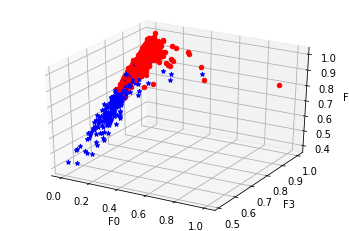

In [8]:
# visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    col = ''
    marker = ''
    if labels[i] == 0:
        col = 'r'
        marker = 'o'
    else:
        col = 'b'
        marker = '*'
    ax.scatter(data[i, 0], data[i, 3], data[i, 4], c=col, marker=marker)

ax.set_xlabel('F0')
ax.set_ylabel('F3')
ax.set_zlabel('F4')

In [11]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(data[:, 4:8])
l = clusterer.labels_
print(set(l))

{0, 1, 2, 3, -1}


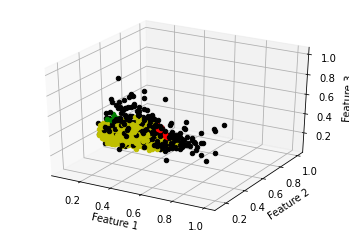

In [20]:
# visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    col = ''
    marker = ''
    if l[i] == 0:
        col = 'r'
        marker = 'o'
    elif l[i] == 1:
        col = 'b'
        marker = '*'
    elif l[i] == 2:
        col = 'g'
        marker = 'o'
    elif l[i] == 3:
        col = 'y'
        marker = 'o'
    else:
        col = 'k'
        marker = 'o'
    ax.scatter(data[i, 5], data[i, 6], data[i, 7], c=col, marker=marker)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
fig.savefig('plot.png')

In [15]:
import collections
collections.Counter(l)

Counter({3: 714, -1: 304, 1: 7, 0: 7, 2: 7})

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN().fit(data[:, 4:8])
l1 = db.labels_
collections.Counter(l1)

Counter({0: 1039})

In [20]:
from sklearn.cluster import OPTICS
c = OPTICS().fit(data)
l2 = c.labels_
collections.Counter(l2)

Counter({-1: 935,
         8: 10,
         10: 6,
         1: 6,
         2: 6,
         9: 5,
         7: 6,
         0: 7,
         6: 7,
         12: 5,
         3: 10,
         13: 6,
         14: 6,
         4: 11,
         11: 8,
         5: 5})